# Script for calling clones based on CRIPSR-Cas9 generated lineage barcode sequencing data for sample b19

In [1]:
source("./endo_target_clone_calling.R")
source("./endo_target_frequent_scar_detection.R")
source("./scar_helper_functions.R")

setwd("./out/")
dat_name <- "b19_tdmr_CA_aut"

Warning message:
"package 'reshape2' was built under R version 4.0.5"
Loading required package: plyr

Warning message:
"package 'plyr' was built under R version 4.0.5"
Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.0.5"

Attaching package: 'data.table'


The following objects are masked from 'package:reshape2':

    dcast, melt


Warning message:
"package 'tidyr' was built under R version 4.0.5"
Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.0.3"

Attaching package: 'igraph'


The following object is masked from 'package:DescTools':

    %c%


The following object is masked from 'package:tidyr':

    crossing


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: stringdis

In [3]:
# Load metadata for cells
cell_anno <- read.delim("./ann_detailed.csv", sep = ",", stringsAsFactors = F, row.names = 1)
cell_anno <- cell_anno[cell_anno$Orig_ident == "b19_tdmr",]
cell_anno$Barcode <- substr(cell_anno$Barcode,7,22)
dim(cell_anno)


[1] 5509   16

## Identification and removal of frequent scars

In [5]:
all.scars.g1 <- read.table("./b19_tdmr_targeted_new_filtering.csv",
                     stringsAsFactors = F, sep = ",", header = T, row.names = 1)

all.scars.g1 <- all.scars.g1[all.scars.g1$Barcode %in% cell_anno$Barcode,]


In [6]:
scar_probabilities_in <- read.csv("./scar_probabilities/Gene_scar_probs.csv",
                                       stringsAsFactors = F)


# Run function. The output will be written into the working directory
compare_scars(input_dat_name = all.scars.g1, # output of the scar filtering
                          dat_name = "b19_tdmr_CA_aut", # output dat_name
                          min.presence = 2, # Cells that have to have a scar for it to be considered present in an organism
                          gene_names = c("actb1", "actb2","rpl39","cfl1","cirbpb", "ube2e1"), # all genes that you want to screen
                          scar_probabilities_in = scar_probabilities_in, # scar probabilities generated from bulk sequencing of many larvae
                          seur_dat = cell_anno, # a seurat metadata file or similar matrix that contains all valid cell barcodes (16-base-barcode only) in a column named "Barcode"
                          primer_set = "2" # can be either 1 or 2 depending on which primer set was used for the library
                         )


[1] "Starting with 16445 entries in scar file."
[1] "Comparing gene actb1"
[1] "Comparing gene actb2"
[1] "Comparing gene rpl39"
[1] "Comparing gene cfl1"
[1] "Comparing gene cirbpb"
[1] "Comparing gene ube2e1"


## Clone determination
### Data preparation:
The clone calling needs several files as inputs:
- The filtered scar files that are the output of the compare_scars() function will be called within the clone calling function.
- The cell_anno file needs to be either a seurat metadata file or similar matrix with valid cell barcodes (16-base-barcode only) in a column named "Barcode" and information for samples (if applicable: only if multiple samples are processed together; otherwise the sample_inf column can be a dummy) in a column called 'sample_inf'. The cell_anno file is then reduced to these two columns.
- A list of wildtype-sequence IDs
- Information on how to shorten the sequences for each gene to be of the correct length and around the correct position of the expected scar. seq_id_delim contain information on start and end of the seq_id within the full sequence.

In [7]:
cell_anno <- cell_anno[,colnames(cell_anno) %in% c('Barcode', 'Celltype_major')]
colnames(cell_anno) <- c('Barcode','sample_inf')

wt_seq_ids <- c("actb1" = "CATTTCTTTTAGTCATTCCAGAAGCGTTTACCACTTTGCC",
                "actb2" = "TGGCGGTGCCAGACATTTGGTGGGGCCAACCTGTACACTG",
                "rpl39" = "CAAGCTGGGCTTGTAAACCACTGTTTACTTCAGCATCCCC",
                "cfl1" = "AGGACACGTATGAAGTTTAGATGGGGAGAGCGATATATTT",
                "cirbpb" = "AAATATTCTAATCCGATCCTCTAATAGAAGCTTGATAAGC",
                "ube2e1" = "GGCGGGTCTAAAAGAGGAACTGGTGTGAAGGGGATCCATA"
                )

seq_id_delim <- list("actb1" = c(27,66), 
                     "actb2" = c(36,75),
                     "rpl39" = c(20,59), 
                     "cfl1" = c(36,75),
                     "cirbpb" = c(19,58),
                     "ube2e1" = c(28,67)
                    )

In [8]:
seur_dat <- cell_anno
cooc_fraction_cutoff <- 0.8
tums_list <- c('all')
genes_list <- c('actb1','actb2','rpl39','cfl1','cirbpb','ube2e1')
dat_wd <- './out/'
dat_name <- "b19_tdmr_CA_aut"
heatmap_after_initial_filt <- T
heatmap_after_final_filt <- T
scar_file_name <- 'Z1_scars_compared_b19_tdmr_CA_aut'

### Call clones on a per-target-gene-basis

[1] "entries in scar input object for gene actb1: 3416"


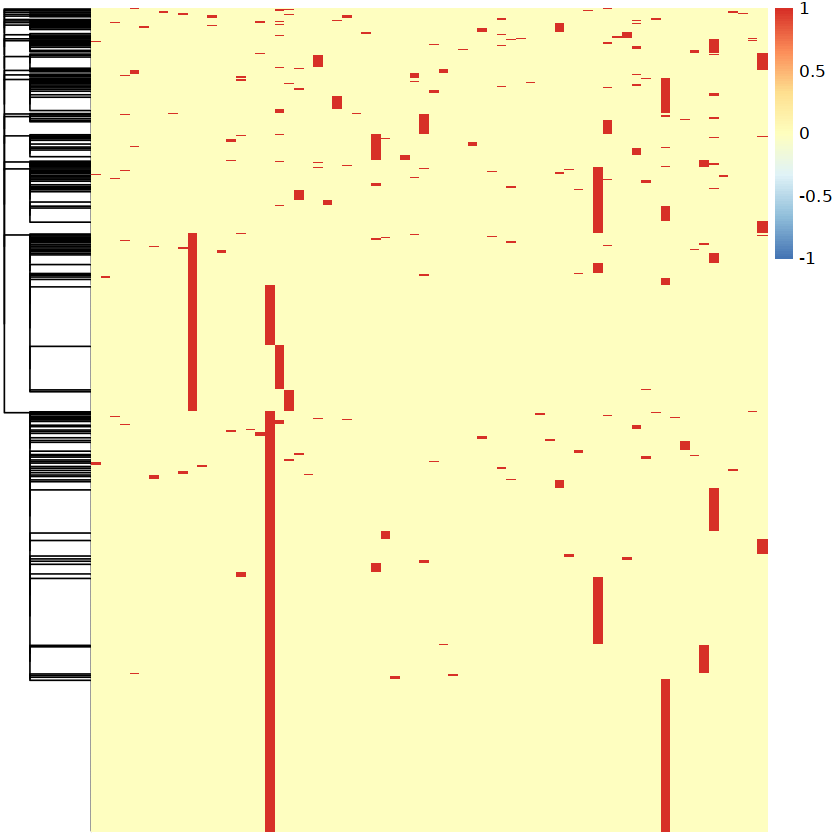

[1] "Sample all, gene actb1: adding 1 cells with a single child scar"
[1] "entries in scar input object for gene actb2: 3437"


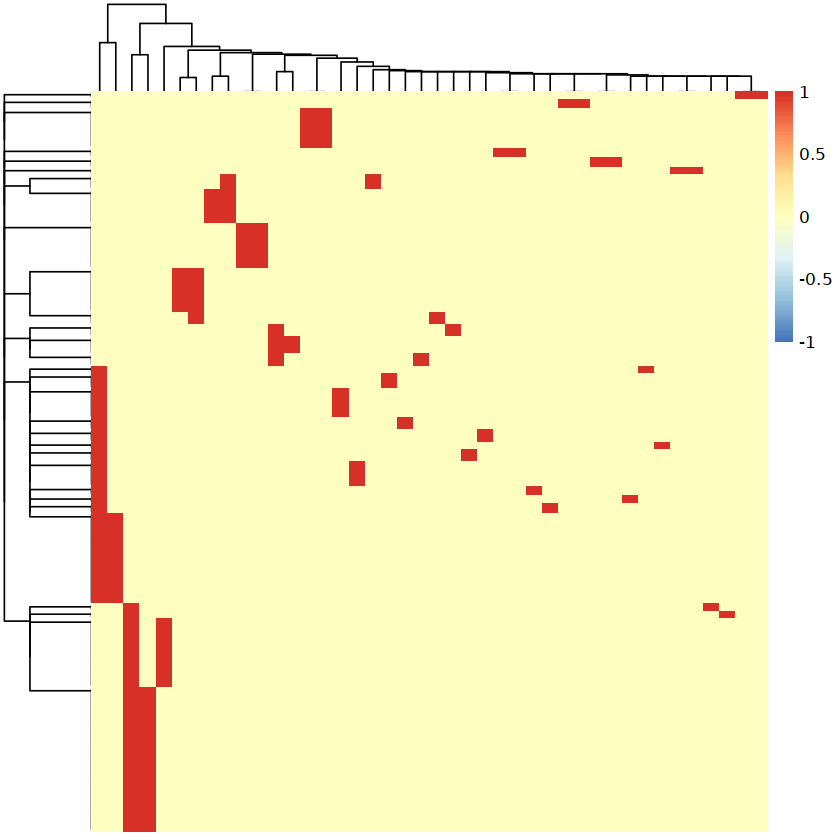

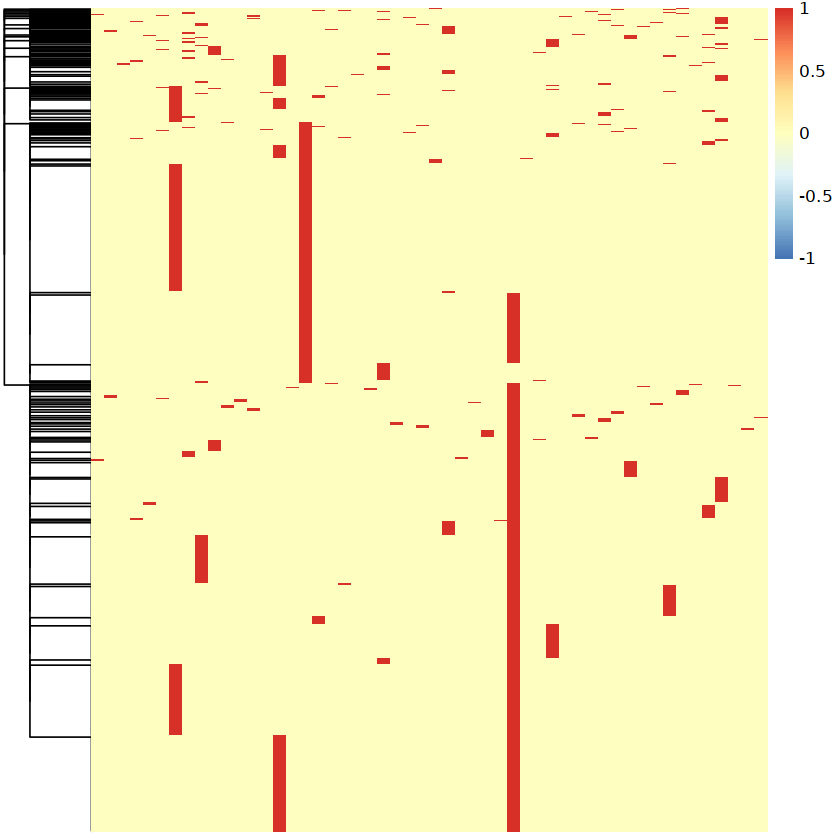

[1] "Sample all, gene actb2: adding 3 cells with a single child scar"
[1] "entries in scar input object for gene rpl39: 3264"


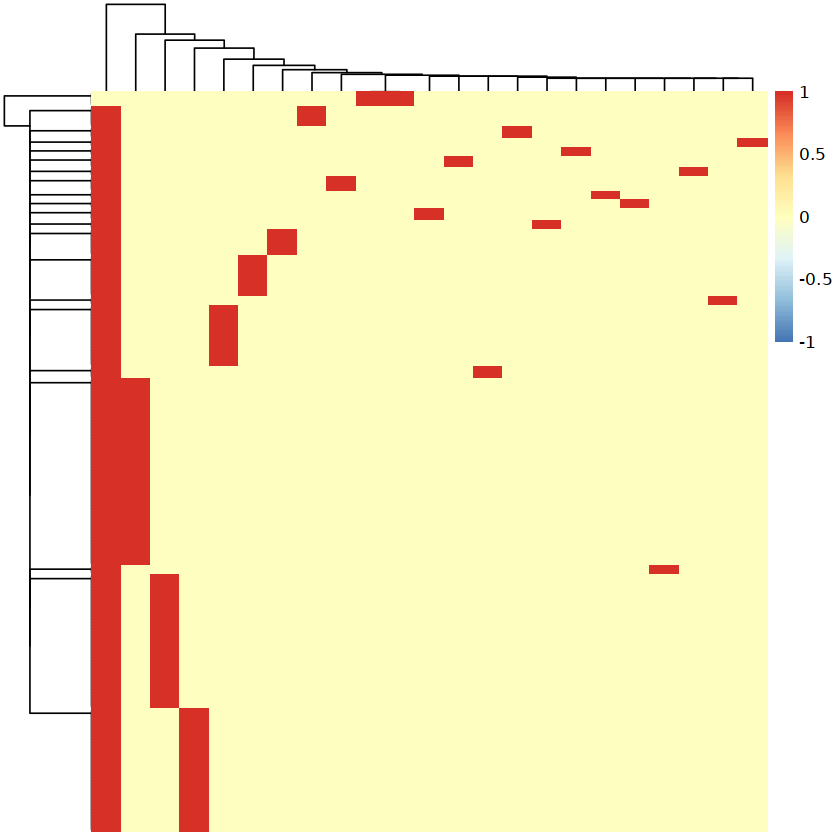

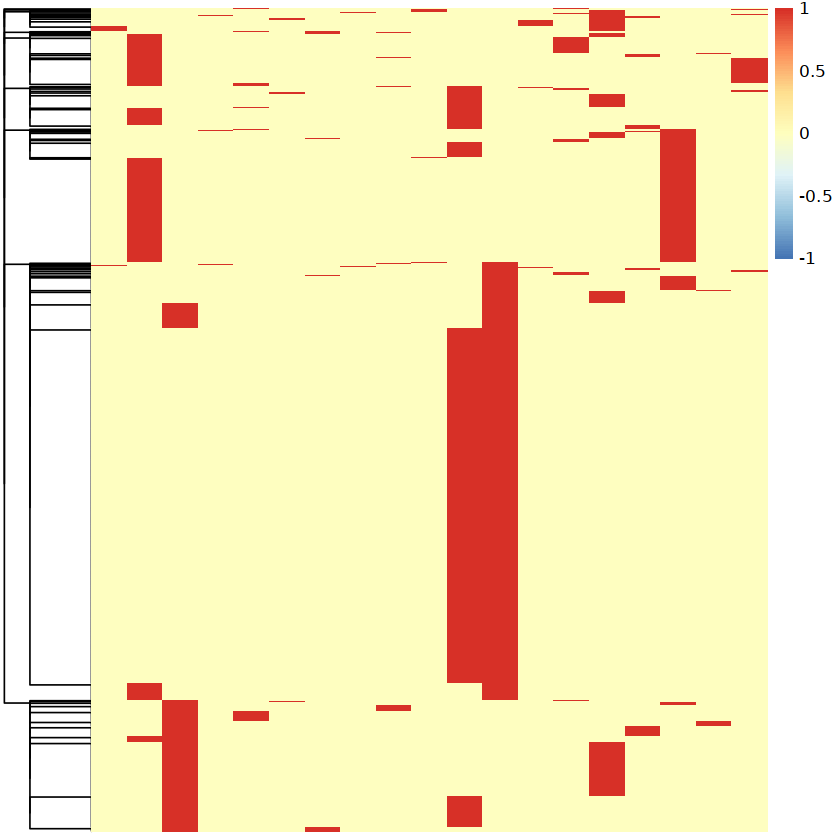

[1] "Sample all, gene rpl39: adding 1 cells with a single child scar"
[1] "entries in scar input object for gene cfl1: 2619"


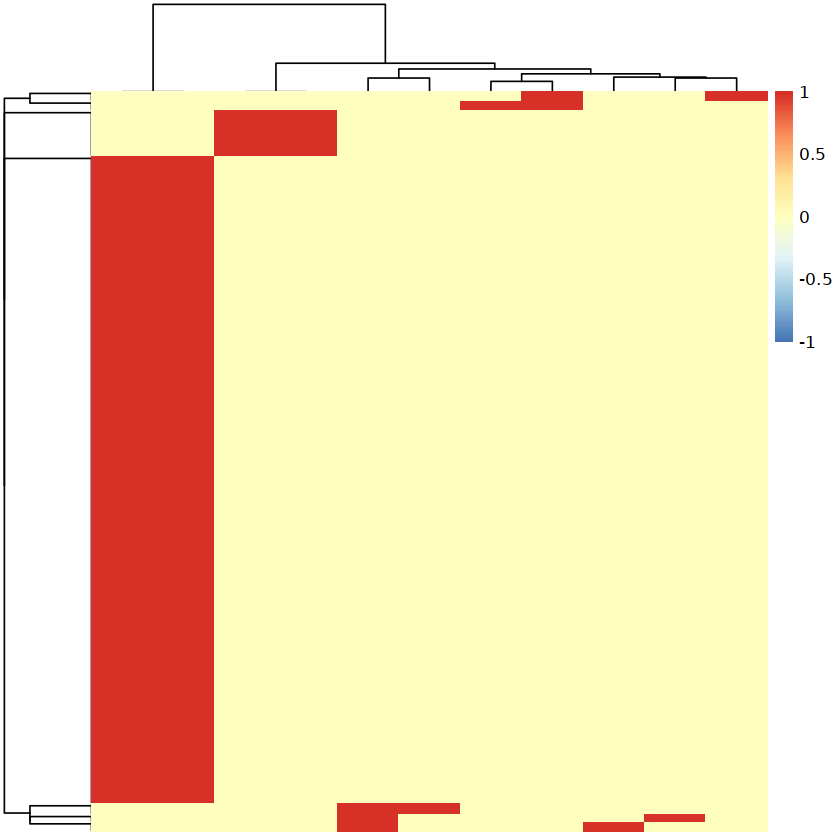

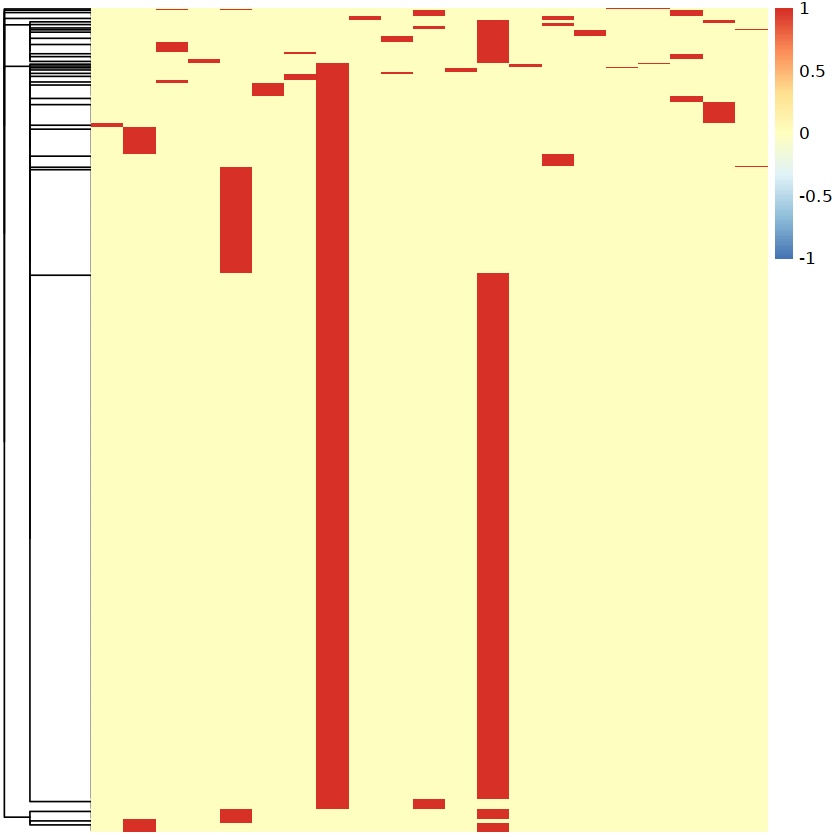

[1] "Sample all, gene cfl1: adding 1 cells with a single child scar"
[1] "entries in scar input object for gene cirbpb: 1363"


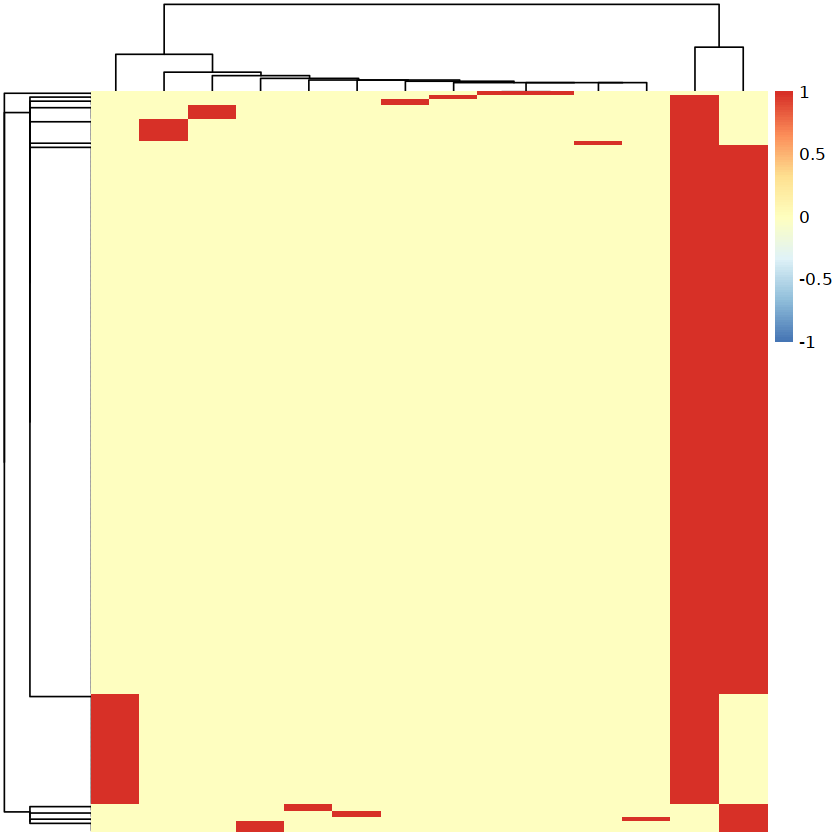

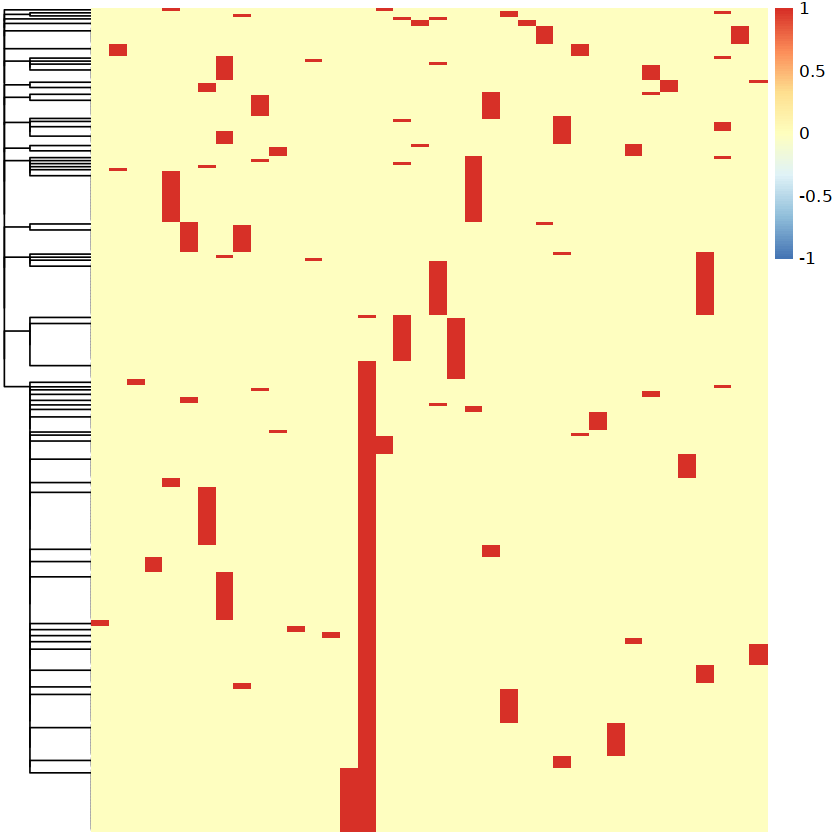

[1] "Sample all, gene cirbpb: adding 1 cells with a single child scar"
[1] "entries in scar input object for gene ube2e1: 526"


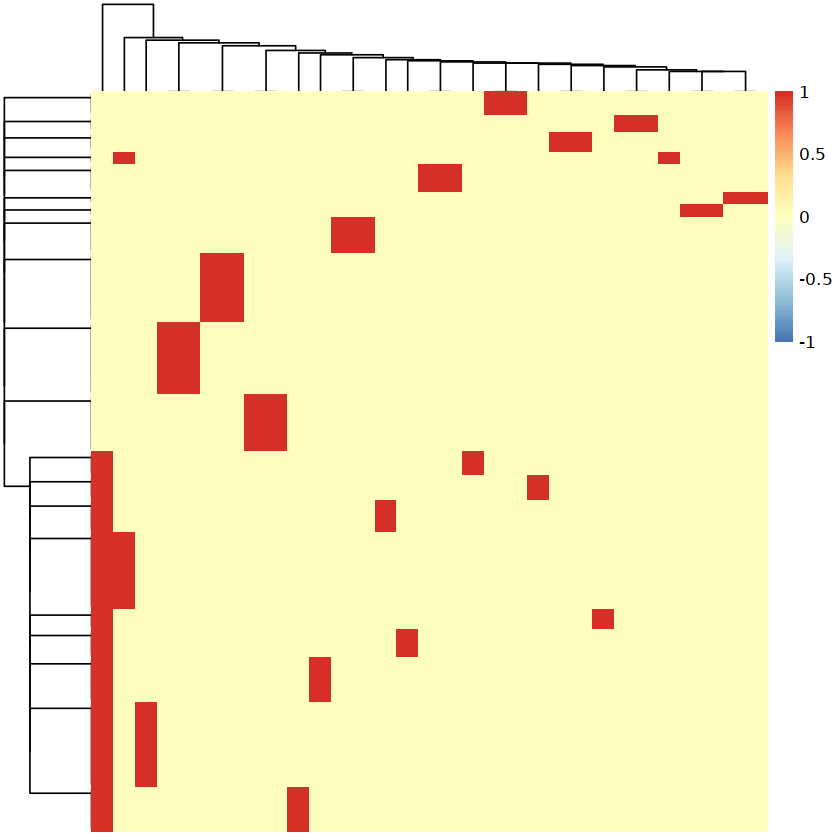

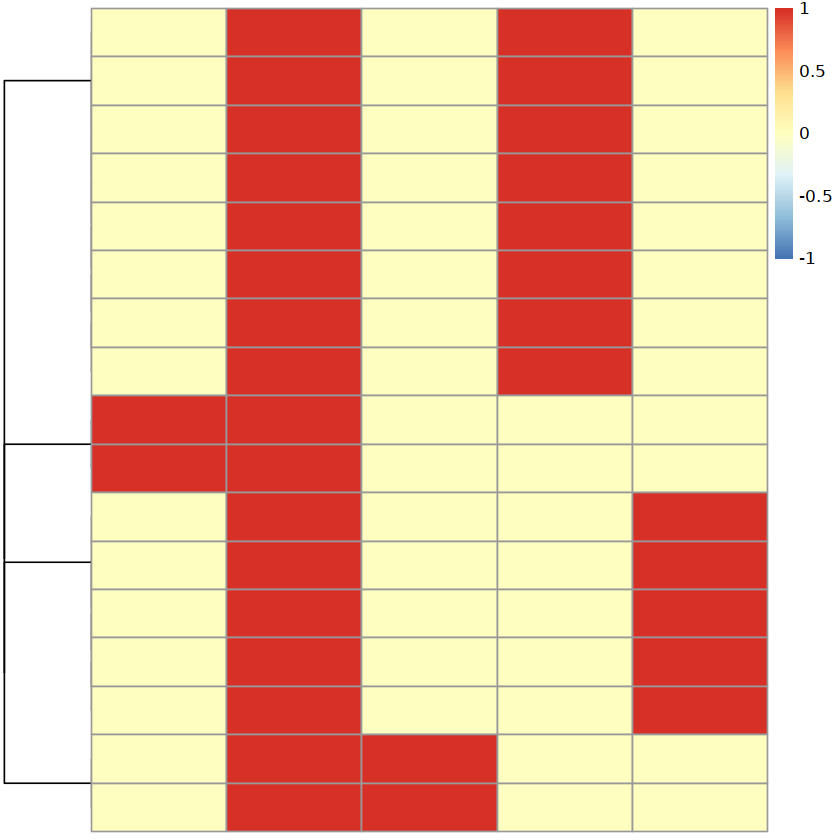

[1] "Sample all, gene ube2e1: No additional cells with only one scar could be classified! Moving to next gene."


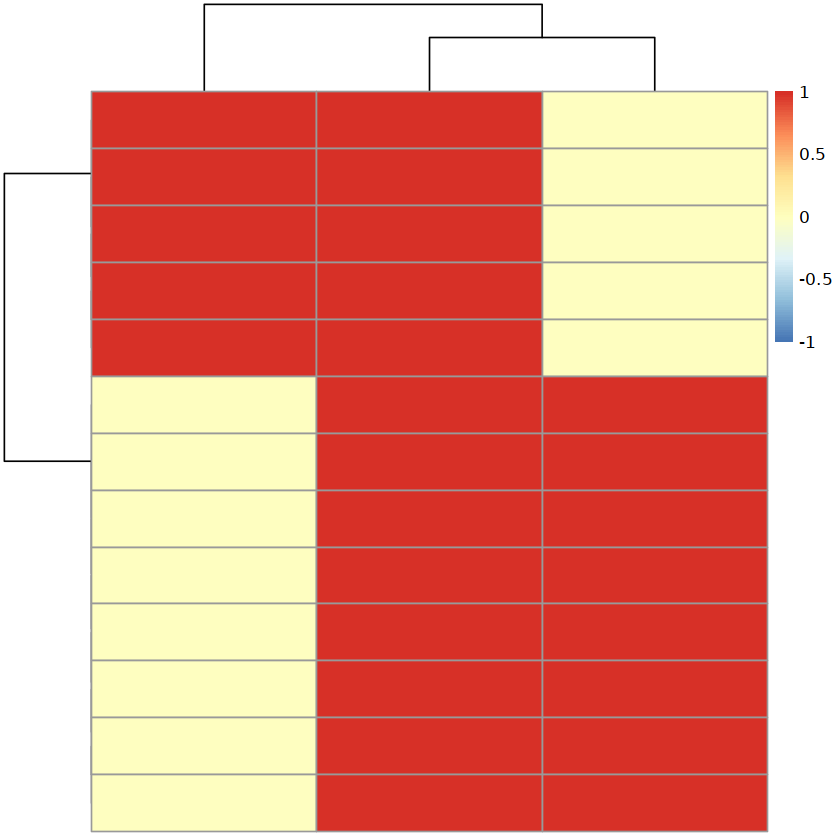

In [9]:
getclones(dat_wd = dat_wd,
          dat_name = dat_name,
          wt_seq_ids = wt_seq_ids,
          seq_id_delim = seq_id_delim,
          heatmap_after_initial_filt = T,
          heatmap_after_final_filt = T, 
          cooc_fraction_cutoff = 0.8,
          seur_dat = seur_dat,
          tums_list = tums_list,
          genes_list = genes_list,
          scar_file_name = scar_file_name
         )

### Merge clone information for all target gene combinations in a pairwise manner

In [ ]:
merge_target_pairs(dat_wd = dat_wd,
                   dat_name = dat_name,
                   cooc_fraction_cutoff = cooc_fraction_cutoff,
                   tums_list = tums_list,
                   genes_list = genes_list
                  )